In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt, floor
from heapq import heappop, heappush
from datetime import datetime
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
short_title = {
    "checkCollisionAction_calls" : "CCA_c",
    "generateSuccessors_calls" : "GS_c",
    "addToClosed_calls" : "ATC_c",
    "addToOpen_calls" : "ATO_c",
    "extractBestNode_calls" : "EBN_c",
    "wasExpanded_calls" : "WE_c",
    "checkCollisionAction_time" : "CCA",
    "generateSuccessors_time" : "GS",
    "addToClosed_time" : "ATC",
    "addToOpen_time" : "ATO",
    "extractBestNode_time" : "EBN",
    "wasExpanded_time" : "WE",
    "whole_runtime" : "1"
}

In [3]:
def show_stats(filename):
    data = pd.read_csv(filename)
    normed_data = pd.DataFrame()
    for title in data.columns:
        if title[-4:] == "time":
            normed_data[short_title[title]] = data[title] / data["whole_runtime"]

    with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
        sns.boxplot(data=normed_data)
        plt.show()

#     calls_data = pd.DataFrame()
#     for title in data.columns:
#         if title[-5:] == "calls":
#             calls_data[short_title[title]] = data[title]
        
#     with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
#         sns.boxplot(data=calls_data)
#         plt.show()

    x = np.linspace(0, 1, 101)
    y = [data["whole_runtime"].quantile(a) for a in x]

    plt.figure()
    plt.plot(x, y)
    plt.show()

    print("whole runtime statistic")
    print("50%:", round(data["whole_runtime"].quantile(0.50), 1), "ms")
    print("75%:", round(data["whole_runtime"].quantile(0.75), 1), "ms")
    print("90%:", round(data["whole_runtime"].quantile(0.90), 1), "ms")
    print("98%:", round(data["whole_runtime"].quantile(0.98), 1), "ms")
    print("100%:", round(data["whole_runtime"].quantile(1.0), 1), "ms")
    print("mean:", round(data["whole_runtime"].mean(), 1), "ms")

In [4]:
def load_data(filename_list):
    data_list = []
    for filename in filename_list:
        data_list.append(pd.read_csv(filename))
    return data_list

def unite_data(data_list, name_list):
    big_data = pd.DataFrame()
    for data, name in zip(data_list, name_list):
        named_data = data
        named_data["pseudonym"] = name
        big_data = pd.concat([big_data, named_data])
    return big_data

In [5]:
def show_united_stats(filename_list, name_list):
    united_data = unite_data(load_data(filename_list), name_list)
    with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
        sns.boxplot(data=united_data, x="pseudonym", y="whole_runtime")
        plt.show()
        
    plt.figure()
    for name in name_list:
        named_data = united_data[united_data["pseudonym"] == name]
        x = np.linspace(0, 1, 101)
        y = [named_data["whole_runtime"].quantile(a) for a in x]
        plt.plot(x, y)
    plt.show()
    
    for name in name_list:
        named_data = united_data[united_data["pseudonym"] == name]
        print(name, "mean:", round(named_data["whole_runtime"].mean(), 1), "ms")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


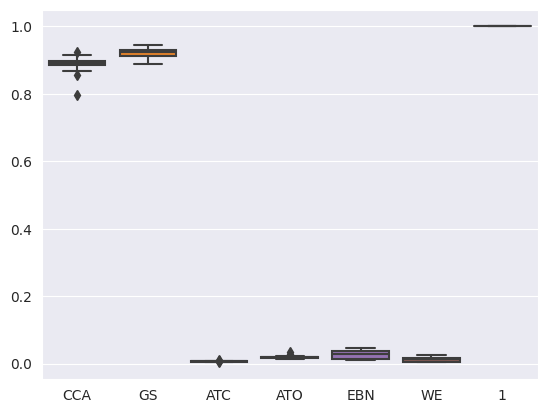

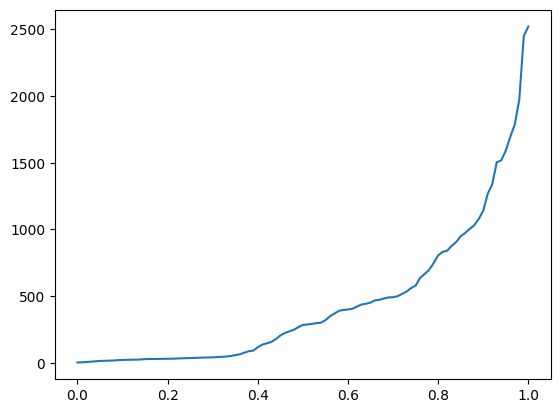

whole runtime statistic
50%: 284.9 ms
75%: 578.7 ms
90%: 1139.8 ms
98%: 1972.5 ms
100%: 2520.4 ms
mean: 446.2 ms


In [6]:
show_stats("runtime.log")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


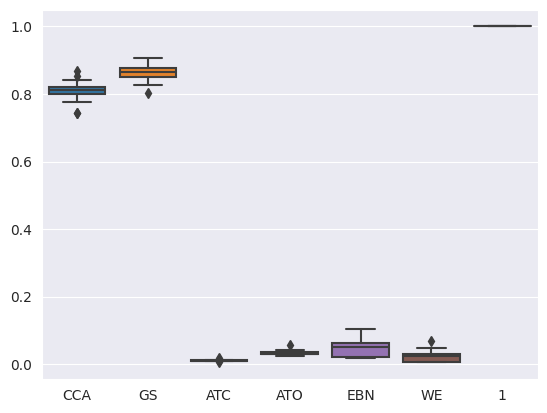

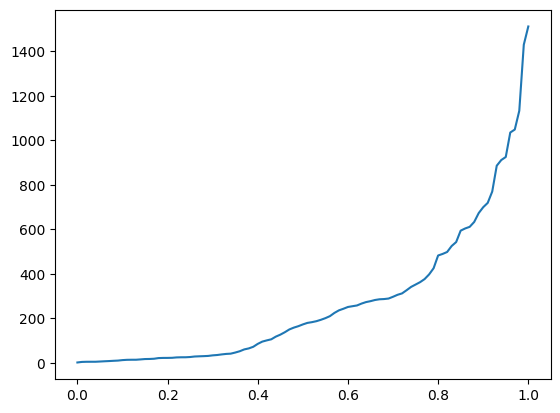

whole runtime statistic
50%: 172.7 ms
75%: 351.9 ms
90%: 699.6 ms
98%: 1133.0 ms
100%: 1512.0 ms
mean: 269.3 ms


In [7]:
show_stats("runtime_2.log")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


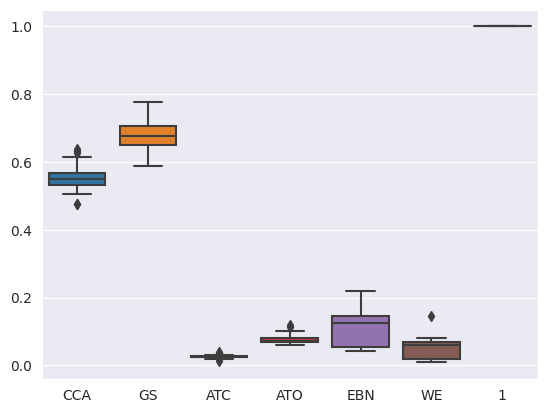

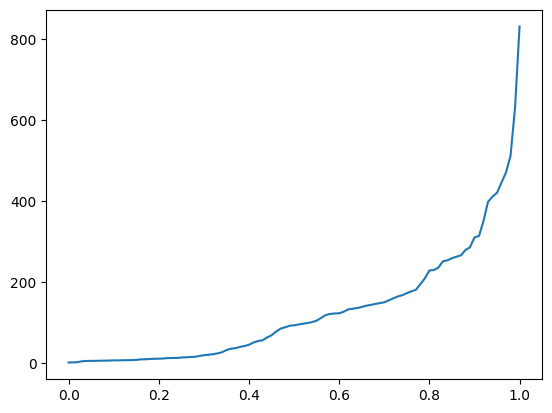

whole runtime statistic
50%: 92.6 ms
75%: 171.9 ms
90%: 309.5 ms
98%: 510.9 ms
100%: 830.4 ms
mean: 128.5 ms


In [8]:
show_stats("runtime_8.log")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


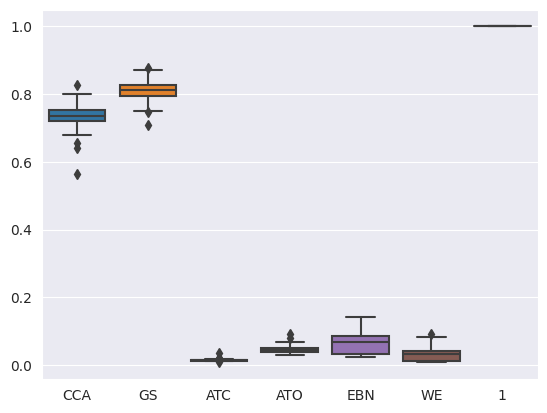

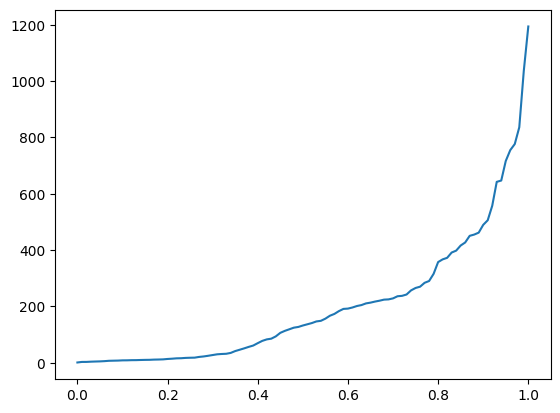

whole runtime statistic
50%: 132.4 ms
75%: 265.7 ms
90%: 489.7 ms
98%: 836.3 ms
100%: 1194.1 ms
mean: 201.2 ms


In [9]:
show_stats("runtime_ncoll_2.log")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


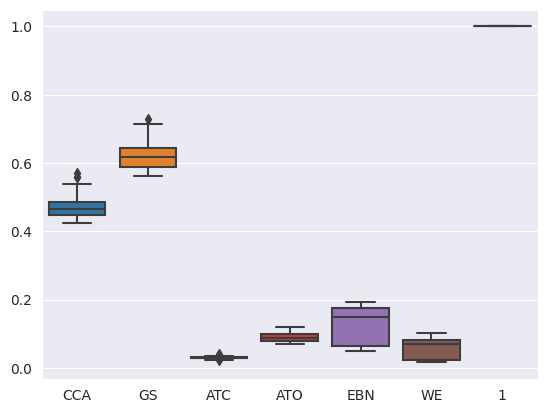

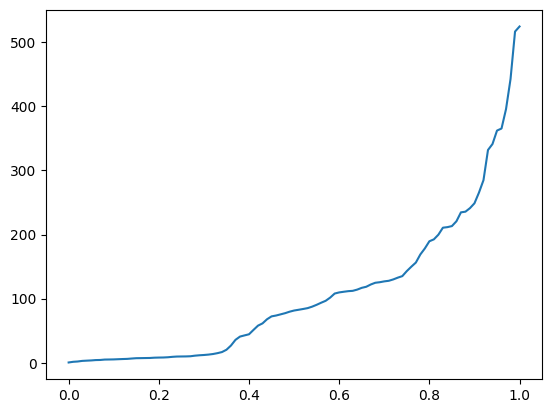

whole runtime statistic
50%: 81.5 ms
75%: 143.0 ms
90%: 248.7 ms
98%: 442.4 ms
100%: 524.3 ms
mean: 107.4 ms


In [10]:
show_stats("runtime_ncoll_8.log")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


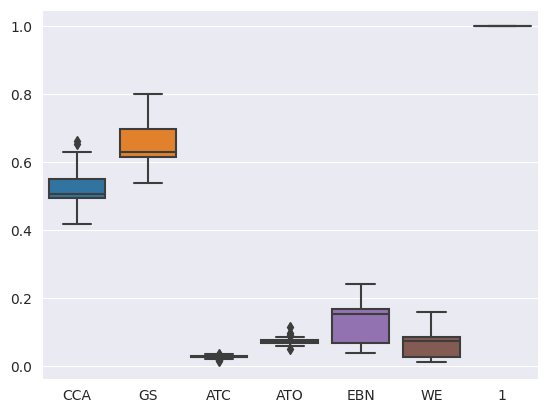

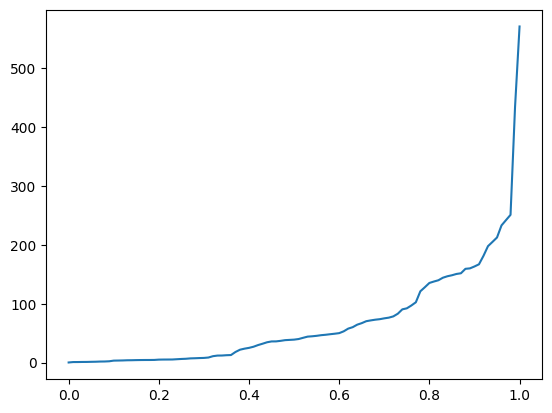

whole runtime statistic
50%: 38.9 ms
75%: 92.1 ms
90%: 163.2 ms
98%: 251.0 ms
100%: 571.0 ms
mean: 68.7 ms


In [11]:
show_stats("runtime_w=10.log")

/home/machine_solution/Documents/Heuristic search/mkn_env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


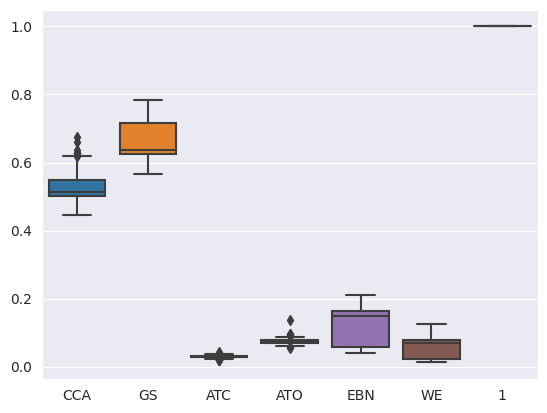

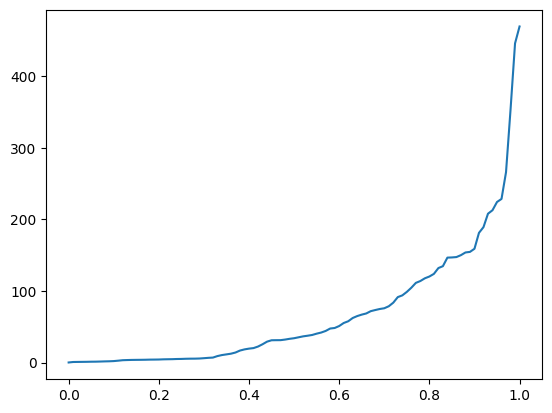

whole runtime statistic
50%: 34.0 ms
75%: 98.7 ms
90%: 159.0 ms
98%: 353.4 ms
100%: 469.8 ms
mean: 67.9 ms


In [12]:
show_stats("runtime_w=100.log")

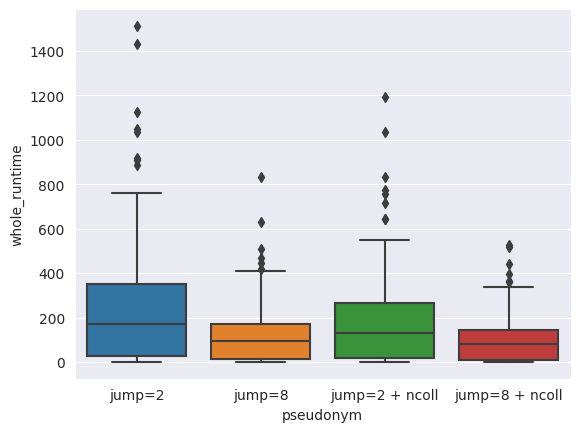

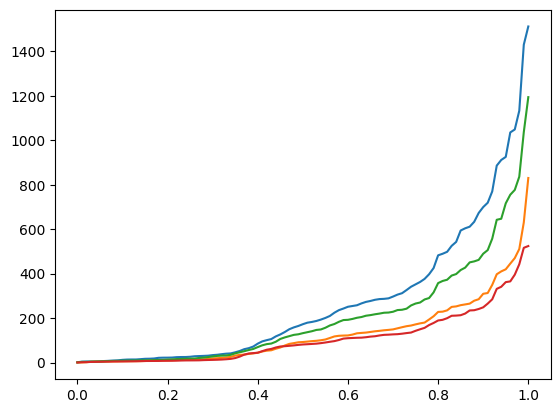

jump=2 mean: 269.3 ms
jump=8 mean: 128.5 ms
jump=2 + ncoll mean: 201.2 ms
jump=8 + ncoll mean: 107.4 ms


In [13]:
show_united_stats(["runtime_2.log","runtime_8.log","runtime_ncoll_2.log","runtime_ncoll_8.log"],
                  ["jump=2","jump=8","jump=2 + ncoll","jump=8 + ncoll"])

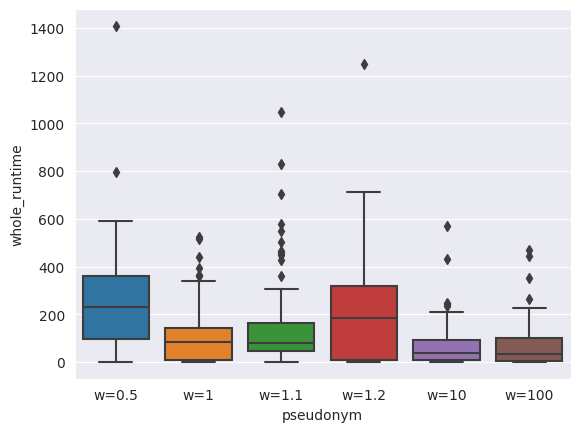

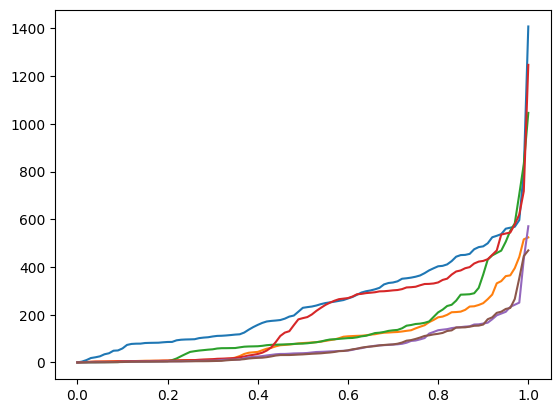

w=0.5 mean: 253.2 ms
w=1 mean: 107.4 ms
w=1.1 mean: 142.8 ms
w=1.2 mean: 199.2 ms
w=10 mean: 68.7 ms
w=100 mean: 67.9 ms


In [16]:
show_united_stats(["runtime_w=0.5.log","runtime_ncoll_8.log","runtime_w=1.1.log","runtime_w=1.2.log","runtime_w=10.log","runtime_w=100.log"],
                  ["w=0.5","w=1","w=1.1","w=1.2","w=10","w=100"])